#Zomato Restaurant Data Analysis (EDA)

##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading data

In [2]:
df_zomato = pd.read_csv("zomato.csv", encoding="latin1")
df_country_code= pd.read_excel("Country-Code.xlsx")

##Preview of the Dataset

In [3]:
df_zomato.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


##Dataset Structure and Data Types

In [4]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

##Drop unnecessary columns to focus on key data

In [5]:
df_zomato.drop(columns=["Longitude","Latitude","Restaurant ID","Address","Locality Verbose"], axis=1,inplace =True)

##List of Dataset Columns

In [6]:
df_zomato.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Locality', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

##Summary Statistics of Numerical Features

In [7]:
df_zomato.describe()

,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,1199.210763,1.804837,2.666370,156.909748
std,56.750546,16121.183073,0.905609,1.516378,430.169145
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.000000,700.000000,2.000000,3.700000,131.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000


##Correlation Analysis

We visualize correlations among numeric features using a heatmap:

<Axes: >

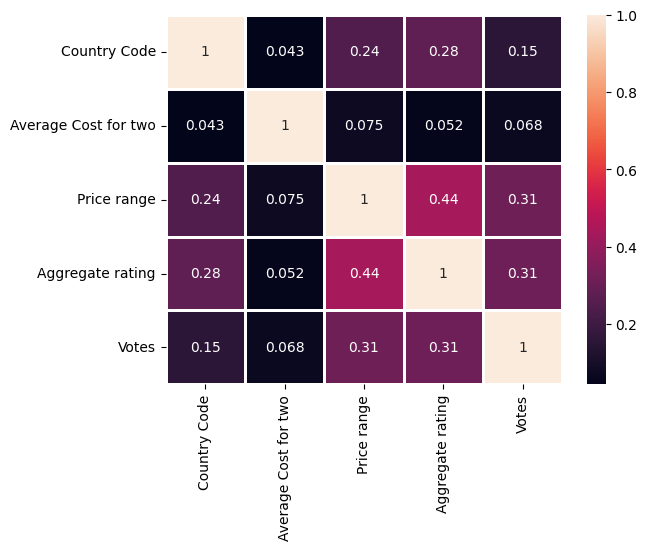

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df_zomato.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


##Missing Values

Checking for missing data is crucial in EDA:


In [9]:
df_zomato.isnull().sum()

,0
Restaurant Name,0
Country Code,0
City,0
Locality,0
Cuisines,9
Average Cost for two,0
Currency,0
Has Table booking,0
Has Online delivery,0
Is delivering now,0


In [10]:
perc_missingdata=df_zomato.isnull().sum()*100/len(df_zomato)
missingdata= pd.DataFrame({'Percentage_Missing':perc_missingdata})
missingdata

,Percentage_Missing
Restaurant Name,0.000000
Country Code,0.000000
City,0.000000
Locality,0.000000
Cuisines,0.094231
Average Cost for two,0.000000
Currency,0.000000
Has Table booking,0.000000
Has Online delivery,0.000000
Is delivering now,0.000000


##Rating Category Analysis

Zomato classifies restaurant ratings into qualitative categories such as *Excellent*, *Very Good*, *Good*, *Average*, *Poor*, and *Not rated*.  
This section examines how restaurants are distributed across these categories to understand overall customer satisfaction trends.

In [11]:
subset_df =df_zomato[['Aggregate rating', 'Rating color', 'Rating text',
       'Votes']]
subset_df

,Aggregate rating,Rating color,Rating text,Votes
0,4.8,Dark Green,Excellent,314
1,4.5,Dark Green,Excellent,591
2,4.4,Green,Very Good,270
3,4.9,Dark Green,Excellent,365
4,4.8,Dark Green,Excellent,229
...,...,...,...,...
9546,4.1,Green,Very Good,788
9547,4.2,Green,Very Good,1034
9548,3.7,Yellow,Good,661
9549,4.0,Green,Very Good,901


###Distribution of Rating Categories

In [12]:
subset_df[['Rating color','Rating text']].value_counts()

,,count
Rating color,Rating text,
Orange,Average,3737
White,Not rated,2148
Yellow,Good,2100
Green,Very Good,1079
Dark Green,Excellent,301
Red,Poor,186


###Rating Range by Category (Min–Max Analysis)

In [15]:
result_rating = subset_df.groupby(['Rating text','Rating color'])[['Aggregate rating']].aggregate(['min','max'])
result_rating

Aggregate rating     
                                      min  max
Rating text Rating color                      
Average     Orange                    2.5  3.4
Excellent   Dark Green                4.5  4.9
Good        Yellow                    3.5  3.9
Not rated   White                     0.0  0.0
Poor        Red                       1.8  2.4
Very Good   Green                     4.0  4.4

###Boxplot of Aggregate Ratings by Rating Category

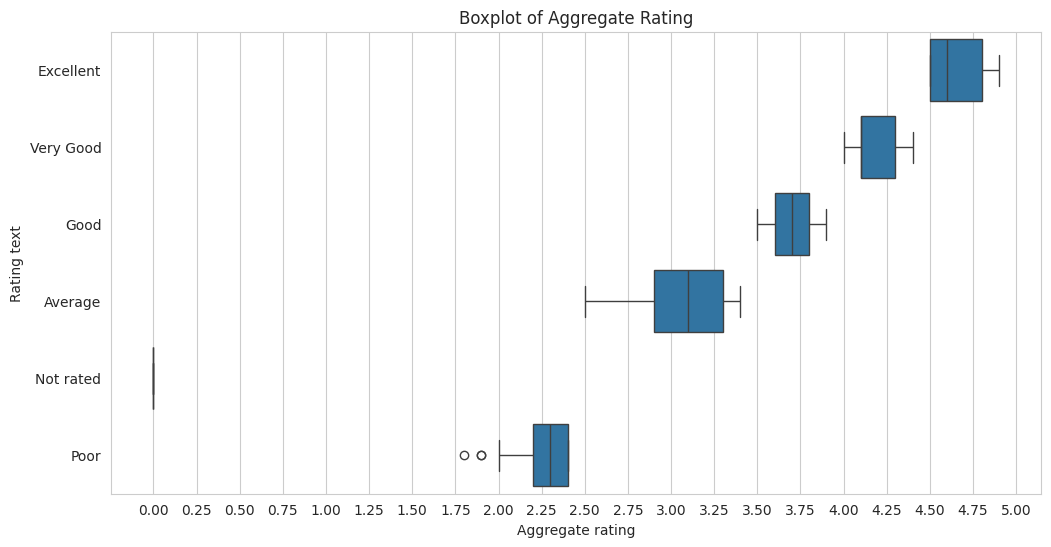

In [164]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Aggregate rating', y='Rating text', data=df_zomato)
plt.xticks(np.arange(0, 5.25, 0.25))
plt.xlabel('Aggregate rating')
plt.title('Boxplot of Aggregate Rating')
plt.show()


###Distribution of Numeric Restaurant Ratings

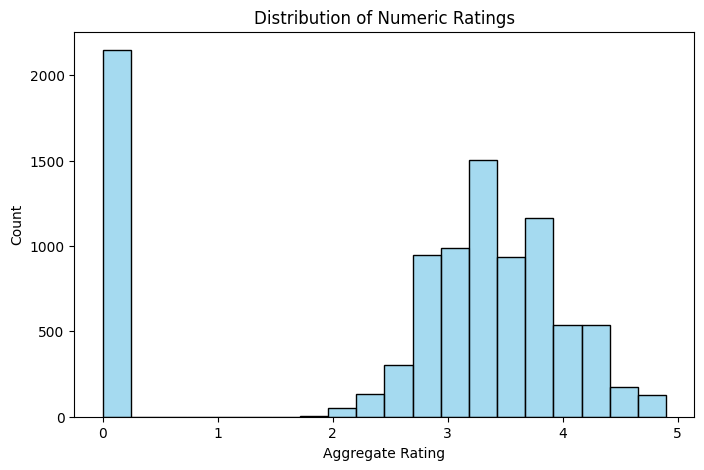

In [133]:
plt.figure(figsize=(8,5))
sns.histplot(df_zomato["Aggregate rating"], bins=20, color='skyblue')
plt.xlabel("Aggregate Rating")
plt.title("Distribution of Numeric Ratings")
plt.show()


##Online Delivery Availability Analysis

This section examines how many restaurants on the Zomato platform offer online delivery services. Understanding delivery availability helps assess the level of digital adoption among restaurants and highlights potential opportunities for service expansion.

In [14]:
df_zomato['Has Online delivery'].value_counts()

,count
Has Online delivery,
No,7100
Yes,2451


/tmp/ipython-input-1813467509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Has Online delivery', data=df_zomato, palette=['skyblue','lightgreen'])


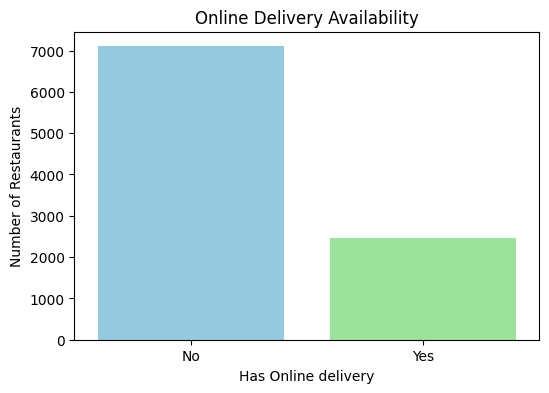

In [135]:
plt.figure(figsize=(6,4))
sns.countplot(x='Has Online delivery', data=df_zomato, palette=['skyblue','lightgreen'])
plt.title("Online Delivery Availability")
plt.ylabel("Number of Restaurants")
plt.show()

##Table Booking Availability Analysis

This section analyzes whether restaurants support table booking, which reflects the adoption of reservation-based dining and service maturity.

In [13]:
df_zomato['Has Table booking'].value_counts()

,count
Has Table booking,
No,8393
Yes,1158


/tmp/ipython-input-1474289200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Has Table booking', data=df_zomato, palette=['salmon','skyblue'])


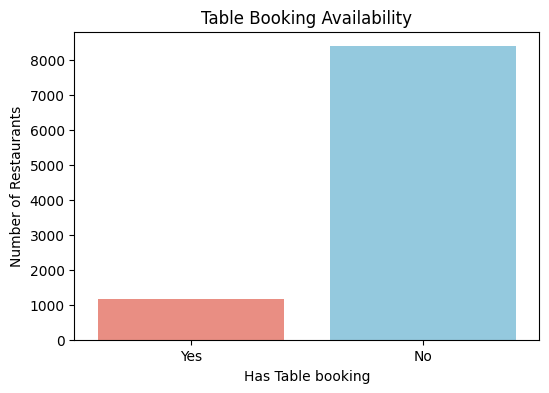

In [136]:
plt.figure(figsize=(6,4))
sns.countplot(x='Has Table booking', data=df_zomato, palette=['salmon','skyblue'])
plt.title("Table Booking Availability")
plt.ylabel("Number of Restaurants")
plt.show()


##Country-Level Analysis

To enable geographical analysis, the Zomato restaurant data is merged with a country code reference dataset. This step allows us to analyze restaurants by country name and currency instead of numeric country codes.

In [18]:
join_df=pd.merge(left=df_zomato,right=df_country_code,left_on='Country Code',right_on='Country Code',how='inner')
join_df

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,208,ÛÁstanbul,Karakí_y,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz AÛôacÛ±,208,ÛÁstanbul,Koôuyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,ÛÁstanbul,Kuruí_eôme,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,Aôôk Kahve,208,ÛÁstanbul,Kuruí_eôme,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


##Country and Currency Distribution

This step examines the distribution of restaurants across different countries and currencies, helping identify the geographical reach and economic diversity of the dataset.

In [22]:
country_names=join_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [23]:
country_values=join_df.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [19]:
currency_df =join_df.loc[:,['Country Code','Country','Currency']]
currency_df.value_counts()

,,,count
Country Code,Country,Currency,
1,India,Indian Rupees(Rs.),8652
216,United States,Dollar($),434
215,United Kingdom,Pounds(£),80
214,UAE,Emirati Diram(AED),60
189,South Africa,Rand(R),60
30,Brazil,Brazilian Real(R$),60
148,New Zealand,NewZealand($),40
208,Turkey,Turkish Lira(TL),34
14,Australia,Dollar($),24


###Country-wise Percentage Penetration

Here, we calculate the percentage contribution of each country to the total dataset. This helps identify dominant markets influencing overall trends.

In [20]:
perc_penetration = join_df.Country.value_counts(normalize=True) * 100
perc_penetration

,proportion
Country,
India,90.587373
United States,4.544027
United Kingdom,0.837609
Brazil,0.628206
South Africa,0.628206
UAE,0.628206
New Zealand,0.418804
Turkey,0.355984
Australia,0.251283


###Top Countries by Restaurant Count

This visualization highlights the top five countries with the highest number of restaurants listed on Zomato. Using a bar chart ensures clarity and avoids overlap issues common in pie charts.

/tmp/ipython-input-4231010953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index,palette='viridis')


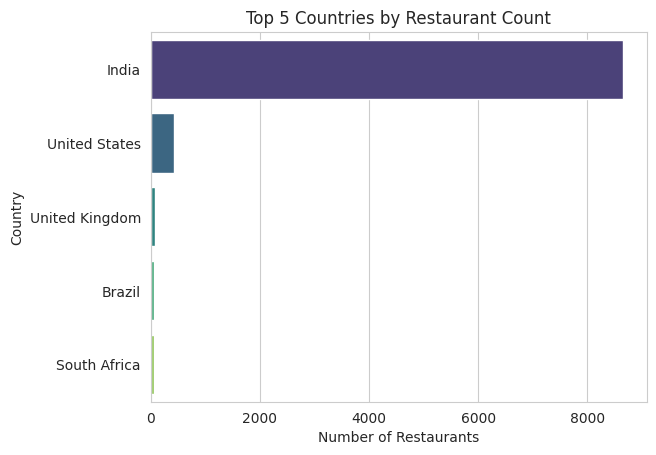

In [163]:
top_countries = join_df['Country'].value_counts().head(5)
sns.barplot(x=top_countries.values,y=top_countries.index,palette='viridis')
plt.title('Top 5 Countries by Restaurant Count')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country')
plt.show()


##Distribution of Online Delivery Status Across Countries

In [32]:
join_df.groupby(['Country','Has Online delivery']).size().reset_index()


,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


###Countries Offering Online Delivery

In [34]:
join_df[join_df['Has Online delivery']=='Yes'].Country.value_counts().reset_index()

,Country,count
0,India,2423
1,UAE,28


###Countries Without Online Delivery

In [45]:
join_df.loc[join_df['Has Online delivery']=='No',['Country','Currency']].value_counts().reset_index()

,Country,Currency,count
0,India,Indian Rupees(Rs.),6229
1,United States,Dollar($),434
2,United Kingdom,Pounds(£),80
3,Brazil,Brazilian Real(R$),60
4,South Africa,Rand(R),60
5,New Zealand,NewZealand($),40
6,Turkey,Turkish Lira(TL),34
7,UAE,Emirati Diram(AED),32
8,Australia,Dollar($),24
9,Phillipines,Botswana Pula(P),22


###Visualization: Online Delivery Availability by Country

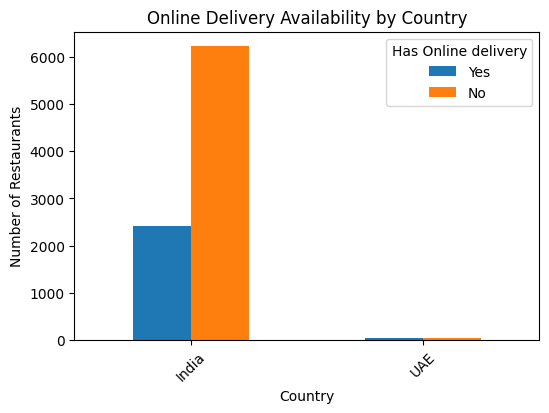

In [142]:
online_by_country = join_df.groupby(['Country', 'Has Online delivery']).size().unstack(fill_value=0)
online_yes = online_by_country[online_by_country['Yes'] > 0]
online_yes[['Yes','No']].plot(kind='bar', figsize=(6,4))
plt.title("Online Delivery Availability by Country")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

##Table Booking Availability Analysis

This section evaluates the adoption of table booking services across countries, which reflects restaurant service maturity and customer reservation behavior.

###Distribution of Table Booking by Country

In [155]:
join_df.groupby(['Country','Has Table booking']).size().reset_index()

,Country,Has Table booking,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,7541
4,India,Yes,1111
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,8
8,Phillipines,Yes,14
9,Qatar,No,19


###Distribution of Table Booking by Country

/tmp/ipython-input-1359893861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Has Table booking',data=join_df,palette={'Yes': 'green', 'No': 'red'})


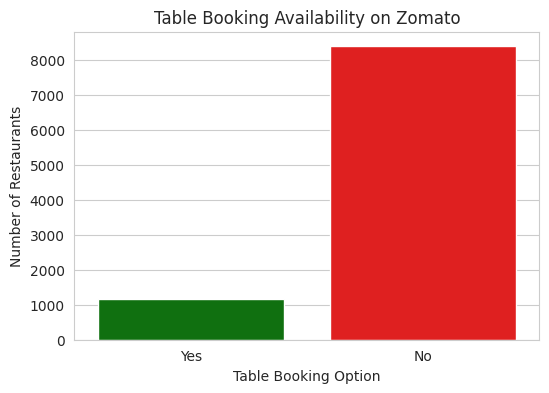

In [154]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='Has Table booking',data=join_df,palette={'Yes': 'green', 'No': 'red'})
plt.title('Table Booking Availability on Zomato')
plt.xlabel('Table Booking Option')
plt.ylabel('Number of Restaurants')
plt.show()

###Top Countries Offering Table Booking

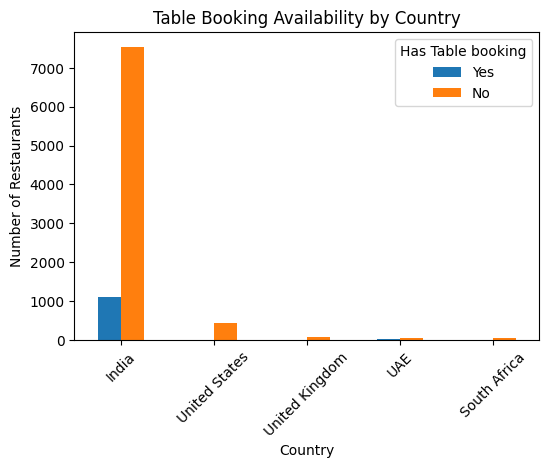

In [146]:
table_by_country[['Yes','No']].loc[table_by_country.sum(axis=1).sort_values(ascending=False).index[:5]].plot(
    kind='bar', figsize=(6,4))
plt.title("Table Booking Availability by Country")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


##City-Level Analysis: Indian Restaurants

In this step, we filter the dataset to include only restaurants located in India. This allows us to perform city-level analysis and better understand regional restaurant distribution within the Indian market.

In [165]:
Indian_cities=join_df[join_df['Country']=='India']

###Top 10 Indian Cities by Number of Restaurants

In [54]:
City_count=Indian_cities['City'].value_counts().head(10)
City_count

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Guwahati,21
Lucknow,21
Bhubaneshwar,21
Ahmedabad,21


###Visualization: Restaurant Distribution Across Indian Cities

/tmp/ipython-input-796006801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=City_count.values,y=City_count.index,palette='viridis')


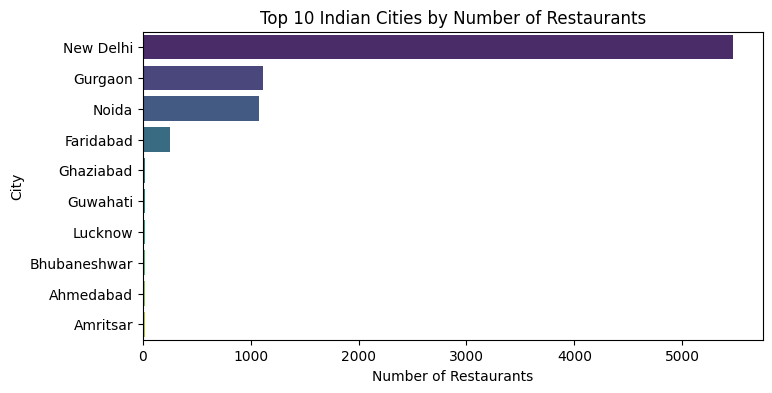

In [152]:
plt.figure(figsize=(8,4))
sns.barplot(x=City_count.values,y=City_count.index,palette='viridis')
plt.title('Top 10 Indian Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


Distribution of Restaurant Rating Categories

This visualization illustrates how restaurants are distributed across different rating categories on the Zomato platform

##Distribution of Restaurant Rating Categories

This section examines how restaurants are distributed across different rating categories on the Zomato platform. Ratings are grouped into qualitative labels such as Not rated, Poor, Average, Good, Very Good, and Excellent, which represent overall customer perception.

/tmp/ipython-input-948186003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating text", data=df_zomato,


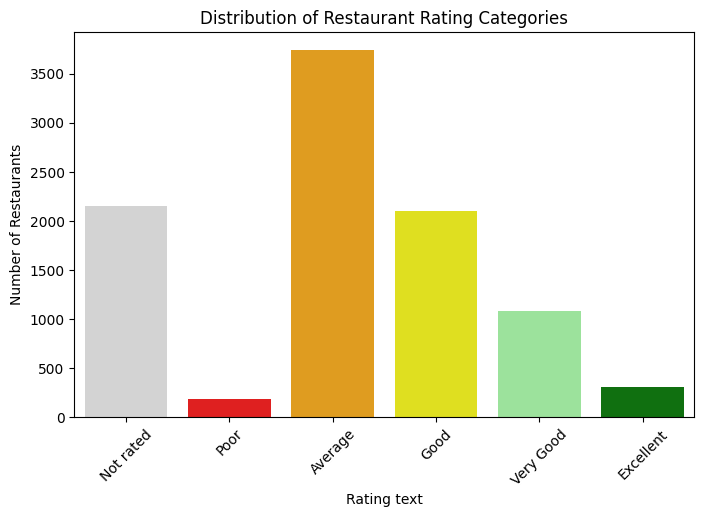

In [130]:
plt.figure(figsize=(8,5))
sns.countplot(x="Rating text", data=df_zomato,
              order=["Not rated","Poor","Average","Good","Very Good","Excellent"],
              palette=['lightgray','red','orange','yellow','lightgreen','green'])
plt.xticks(rotation=45)
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Rating Categories")
plt.show()


##Average Cost for Two: Country-Level Analysis

This section analyzes the average dining cost for two people across different countries and currencies. Grouping by both country and currency ensures meaningful comparisons without mixing monetary units.

In [112]:
join_df.groupby(['Country','Currency'])['Average Cost for two'].mean().sort_values(ascending=False).round(1)

,,Average Cost for two
Country,Currency,
Indonesia,Indonesian Rupiah(IDR),281190.5
Sri Lanka,Sri Lankan Rupee(LKR),2375.0
Phillipines,Botswana Pula(P),1606.8
India,Indian Rupees(Rs.),623.4
South Africa,Rand(R),419.7
Qatar,Qatari Rial(QR),223.8
UAE,Emirati Diram(AED),166.4
Singapore,Dollar($),155.8
Brazil,Brazilian Real(R$),134.7


##🇮🇳 City-wise Average Cost for Two in India

After narrowing the dataset to Indian restaurants, we analyze how the average cost for two varies across cities. This highlights regional affordability differences and identifies premium urban dining markets.

In [115]:
Indian_cities.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).round(1)

,Average Cost for two
City,
Panchkula,2000.0
Hyderabad,1361.1
Pune,1337.5
Jaipur,1310.0
Kolkata,1272.5
Bangalore,1232.5
Goa,1175.0
Ludhiana,1160.0
Chennai,1085.0


###Visualization: Top Indian Cities by Average Cost for Two

/tmp/ipython-input-2671538091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Cost for two',y='City',data=country_cost,palette='magma')


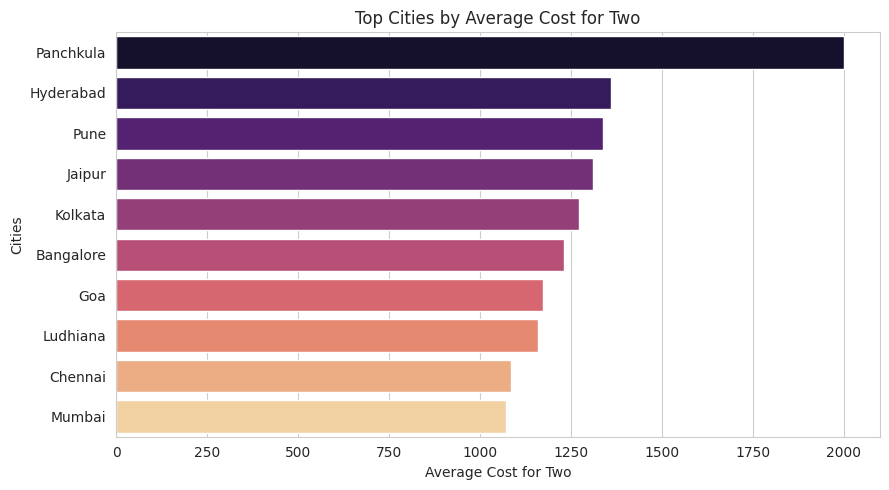

In [162]:
country_cost = (Indian_cities.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10).reset_index())
plt.figure(figsize=(9,5))
sns.barplot(x='Average Cost for two',y='City',data=country_cost,palette='magma')
plt.title('Top Cities by Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Cities')
plt.tight_layout()
plt.show()


##Price Range Distribution Analysis

Zomato categorizes restaurants into four price ranges. In this section, we map these numeric ranges to descriptive labels and examine their percentage distribution across the dataset.

In [167]:
price_map = {1: 'Low',2: 'Medium',3: 'High',4: 'Very High'}
join_df['Price Category'] = join_df['Price range'].map(price_map)
price_pct = join_df['Price Category'].value_counts(normalize=True) * 100
price_pct


,proportion
Price Category,
Low,46.529159
Medium,32.593446
High,14.741912
Very High,6.135483


###Visualization: Percentage Share of Price Categories

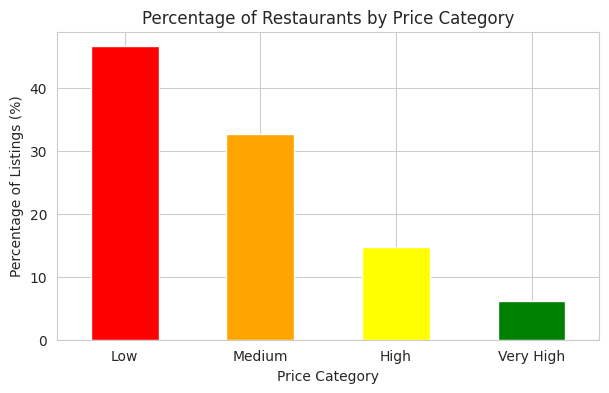

In [168]:
plt.figure(figsize=(7,4))
price_pct.loc[['Low','Medium','High','Very High']].plot(kind='bar',color=['red','orange','yellow','green'])
plt.title("Percentage of Restaurants by Price Category")
plt.ylabel("Percentage of Listings (%)")
plt.xticks(rotation=0)
plt.show()


##Cuisines vs. Price Tiers

Finally, we explore which cuisines are common in each price range. Since each restaurant can have multiple cuisines listed (e.g., “Italian, Chinese”), we split and count them:

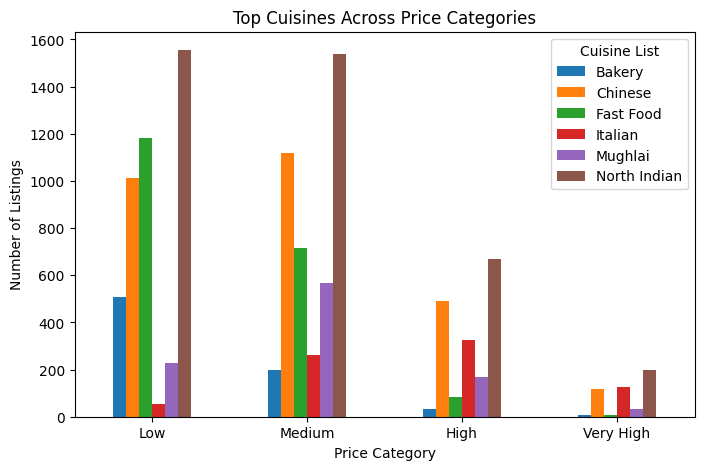

In [150]:
join_df['Cuisine List'] = join_df['Cuisines'].str.split(', ')
cuisine_exploded = join_df.explode('Cuisine List')
cuisine_exploded['Cuisine List'] = cuisine_exploded['Cuisine List'].str.strip()
top_cuisines = cuisine_exploded['Cuisine List'].value_counts().head(6).index.tolist()
cuisine_counts = cuisine_exploded[cuisine_exploded['Cuisine List'].isin(top_cuisines)]
pivot = pd.pivot_table(cuisine_counts, index='Price Category', columns='Cuisine List',
                       aggfunc='size', fill_value=0).reindex(['Low','Medium','High','Very High'])

pivot.plot(kind='bar', figsize=(8,5))
plt.title("Top Cuisines Across Price Categories")
plt.ylabel("Number of Listings")
plt.xticks(rotation=0)
plt.show()


##Final Conclusion

This Exploratory Data Analysis (EDA) project analyzed restaurant data from the Zomato platform to uncover meaningful patterns related to geography, pricing, ratings, cuisines, and service availability. By integrating restaurant-level information with country-level metadata, the analysis provides a clear view of how dining experiences and market characteristics vary across regions and cities.

##Key Insights
###Geographical Distribution

The dataset is highly concentrated in India, which contributes the majority of restaurant listings.

A small number of countries dominate the platform, meaning that global trends observed in the data are strongly influenced by these key markets.

###City-Level Trends in India

Major metropolitan cities account for the highest number of restaurants.

These cities also exhibit higher average dining costs, reflecting greater urban demand, higher purchasing power, and the presence of premium dining options.

###Pricing Patterns

Most restaurants fall into the Low and Medium price categories.

High and Very High price restaurants represent a much smaller segment of the market.

This indicates that Zomato primarily caters to affordability-driven consumers.

###Ratings and Customer Perception

A large proportion of restaurants are rated “Average” or remain “Not rated”, suggesting either moderate customer satisfaction or limited customer feedback.

Only a small fraction of restaurants achieve “Excellent” ratings, highlighting strong competition and the importance of service quality and consistency.

###Price vs Rating Relationship

Higher pricing does not guarantee higher customer ratings.

Well-rated restaurants are present across all price ranges, indicating that food quality, service, and overall experience play a more critical role than price alone.

###Service Availability

The majority of restaurants do not offer online delivery or table booking.

Online delivery is concentrated in select countries and urban regions.

This reveals a significant opportunity for restaurants to expand digital services and differentiate themselves in competitive markets.

###Cuisine Trends

Lower price categories are dominated by casual and fast-service cuisines.

Higher price ranges feature a more diverse mix of international and premium cuisines, reflecting evolving consumer preferences as spending capacity increases.


##
##Business & Analytical Takeaways

Restaurants can improve competitiveness by enabling online delivery or table booking and focusing on customer experience rather than pricing alone.

Food aggregators can identify high-growth cities and markets by analyzing restaurant density, pricing, and service adoption.

Pricing strategies should be aligned with city-level demand and consumer preferences rather than assuming higher prices lead to better perception.

##Learning Outcome

This project strengthened practical skills in:

Data cleaning and preprocessing

Feature engineering and aggregation

Visualization and storytelling using data

Extracting meaningful business insights from real-world datasets


#👤 Project By

Amaan Khan
📧 Email: amaankhanamaan8@gmail.com